### **Problem Statement**
Dream Housing Finance Company provides home loans to customers in urban, semi-urban, and rural areas. When a customer applies for a loan, the company checks their eligibility before approval. To speed up this process, they want to build an automated system that evaluates loan eligibility in real time based on details like Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and more. This will help them focus on the right customer groups and improve efficiency.

Loan approval is a common challenge for banks. Automating it can save time, reduce costs, and improve customer service. A good system will help the bank decide which loans to approve while reducing the risk of defaults.

### **Translating the Business Problem into a Data Science/Machine Learning Problem**

This is a **binary classification problem** where the goal is to predict whether a loan application will be **approved (Y) or not approved (N)** based on customer details. The **target variable** is **Loan_Status**, which has two possible outcomes:  

- **Y (Approved)**
- **N (Not Approved)**  

The **independent variables (features)** include **demographic, financial, and credit-related factors** such as:  

- **Gender**  
- **Marital Status**  
- **Education**  
- **Number of Dependents**  
- **Income**  
- **Loan Amount**  
- **Credit History**  
- **Other relevant features**  

The problem can also be framed as predicting the **risk of default**—if a loan is likely to default, it should not b


### **Hypothesis Generation**  

Hypothesis Generation is the process of identifying all possible factors that could influence the outcome, i.e., which features impact loan approval. Some possible hypotheses are:  

- **Education**: Applicants with higher education levels (e.g., graduates) should have a higher chance of loan approval.  
- **Income**: Applicants with higher income should have better chances of getting their loans approved.  
- **Loan Amount**: If the loan amount is lower, the chances of approval should be higher.  
- **Loan Term**: Loans with a shorter repayment period should have a higher likelihood of approval.  
- **Previous Credit History**: Applicants who have repaid previous debts on time should have a higher chance of loan approval.  
- **Monthly Installment Amount**: If the monthly installment amount is low, the chances of approval should be high.  
- **Other Factors**: Additional factors such as employment status, number of dependents, and co-applicant income may also influence approval.  

Some of these hypotheses seem intuitive, while others may not be as obvious. We will analyze the dataset to validate each hypothesis and determine its actual impact on loan approval.  


### **Data Collection**  

The dataset has been provided by **Analytics Vidhya** on the Hackathon page.  

- The dataset will be used to train the model, meaning the model will learn patterns from this data. It contains both **independent variables (features)** and the **target variable (Loan_Status)**.  

#### **Dataset Overview:**  
- **Dataset**: 13 feature columns, 614 records  

This structured dataset will help in building a reliable predictive model for loan approval.  


### **Exploratory Data Analysis (EDA)**  

We will use **Python** to explore the dataset and gain a deeper understanding of the features and the target variable. The goal of EDA is to analyze and summarize the main characteristics of the data, identify patterns, and detect any anomalies.  

To achieve this, we will use **various visualization techniques**, including:  
- **Univariate Analysis**: Examining individual features using histograms, box plots, and bar charts.  
- **Bivariate Analysis**: Understanding relationships between features and the target variable using scatter plots, heatmaps, and pair plots.  
- **Missing Value Analysis**: Identifying and handling missing data.  
- **Outlier Detection**: Detecting unusual values that might impact model performance.  

These steps will help in preparing the data for building an effective predictive model.  


In [1024]:
# importing the libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [1025]:
# loaing the train and test dataset
train = pd.read_csv('train_data.csv')

In [1026]:
train_original = pd.read_csv('train_data.csv')

In [1027]:
# overview of data
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [1028]:
train.shape

(614, 13)

Dataset Overview  

- The training set has 614 records with 13 feature columns and the target variable Loan_Status.  
   



In [1029]:
# show the type of data for each columns of the train set
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

**Note:**  

There are 3 data types in the dataset:  

- **object:** Categorical variables, which include:  
  Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status  

- **int64:** Integer variables. Example:  
  ApplicantIncome  

- **float64:** Numerical variables with decimal values. These include:  
  CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History  


### Why Data Types are Important?  

Datatypes play a crucial role in data analysis because statistical methods apply differently to various data types.  

- **Categorical data** (e.g., Gender, Education) requires encoding techniques before being used in a model.  
- **Numerical data** (e.g., Income, Loan Amount) can be used for calculations like mean, median, and correlations.  

Analyzing continuous data as categorical or vice versa can lead to incorrect conclusions. Understanding data types helps in selecting the right preprocessing techniques and statistical methods for accurate analysis.  


In [1030]:
# summery of the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### **Univariate Analysis**  

Univariate analysis involves analyzing each variable individually.  

- **Categorical Features**: Use **frequency tables** or **bar plots** to count and visualize categories.  
- **Numerical Features**: Use **histograms** to understand distribution (central tendency, variability, modality, kurtosis).  
- **Box-plots**: Help detect outliers, which histograms cannot show.  

#### **Target Variable (Categorical)**  
First, we analyze the **Loan_Status** variable. Since it is categorical, we will examine:  
- Frequency table  
- Percentage distribution  
- Bar plot for visualization  


In [1031]:
# frequency table of a variable will give use the count of each category in that variable
train['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [1032]:
# percentage distrubution can be calculated by setting the normalize true to show proportion insted of number
train['Loan_Status'].value_counts(normalize=True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

<Axes: xlabel='Loan_Status'>

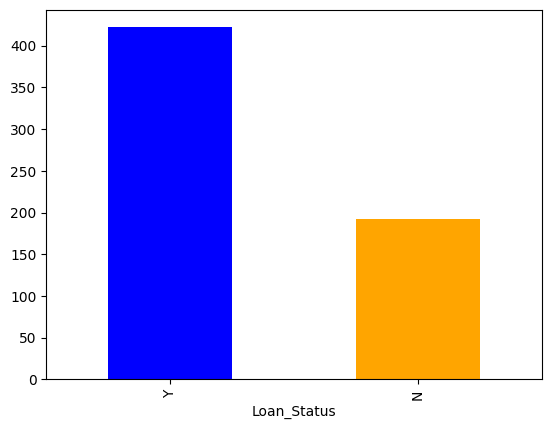

In [1033]:
# bar plot to visulalize the frequency
train['Loan_Status'].value_counts().plot.bar(color=['blue','orange'])

The loan of 422 people out of 614 was approved there is no imbalaced classes issue in this dataset thus accuracy as an evaluation metric should be appropriate.On the other hand ,if there are skewd classes then we might need to use precision and recall as evalution metric

### **Independent Variable(Categorical)**
There are 5 features that are categorical or binary(Gender,Married,Self_Employed,Credit_History,Education)

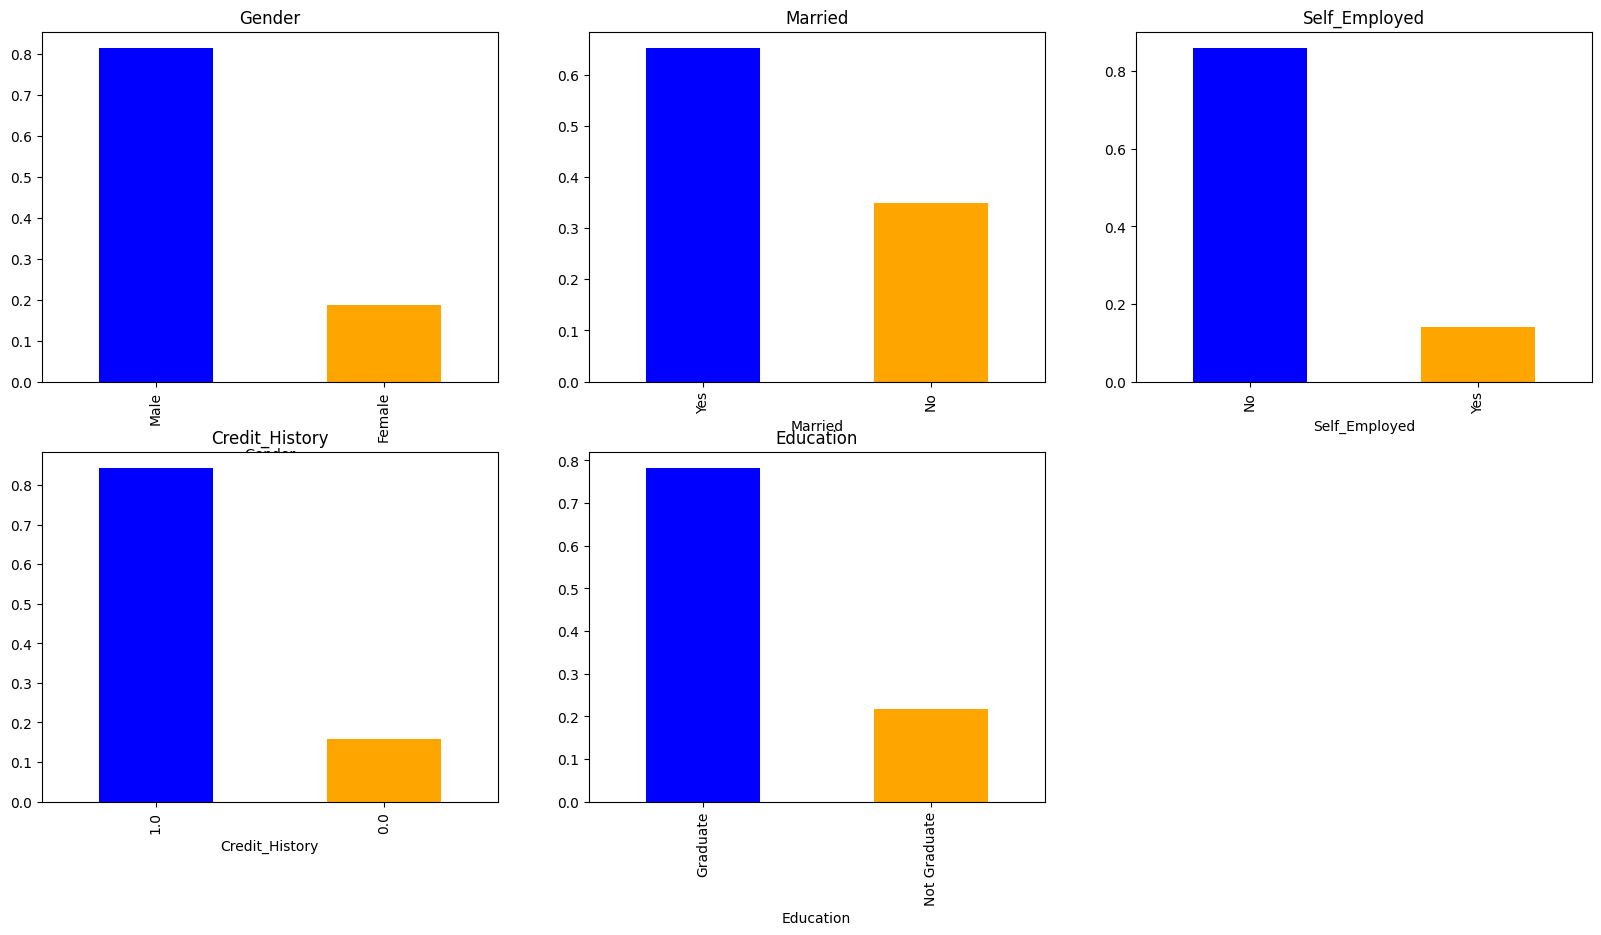

In [1034]:
# visualizing categorical features
# plt.figure(1)
plt.subplot(231)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender',color=['blue','orange'])

plt.subplot(232)
train['Married'].value_counts(normalize=True).plot.bar(title='Married',color=['blue','orange'])

plt.subplot(233)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed',color=['blue','orange'])

plt.subplot(234)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History',color=['blue','orange'])

plt.subplot(235)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education',color=['blue','orange'])

plt.show()

It can be inferred from the above bar plots that:

- 80% applicants in the dataset are male.
- around 65% of the applicants in the dataset are married.
- around 15% applicants in the dataset are self employed.
- around 85% applicants have crdit history(repaid their debts).
- around 80% of the applicants are Graduate.

### **Independent Variable(Ordinal)**
There are 2 featues that are Ordinal: Variables in categorical features having some order involved (Dependent,Property_Area)

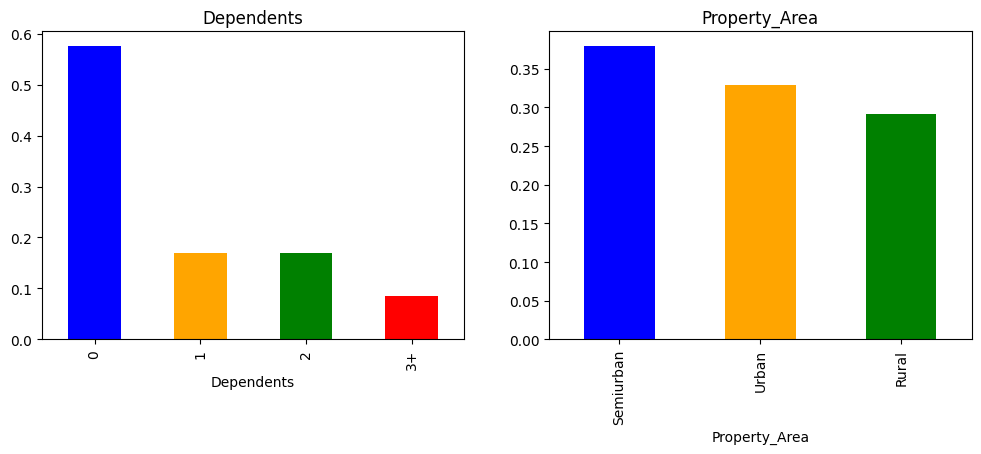

In [1035]:
# Visualizing remaining categorical features
# plt.figure(1)
plt.subplot(121)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(12,4),title='Dependents',color=['blue','orange','green','red'])

plt.subplot(122)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area',figsize=(12,4),color=['blue','orange','green','red'])
plt.show()

Following inferences can be made from the above bar plots:
- more than half of the applicants don't have dependents
- most of the applicants are from semiurban area.

### **Independent Variable(Numerical)**

There are 4 features that are numerical:These features have numerical values(ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term)

Firstly,lets look the Applicants income distribution:

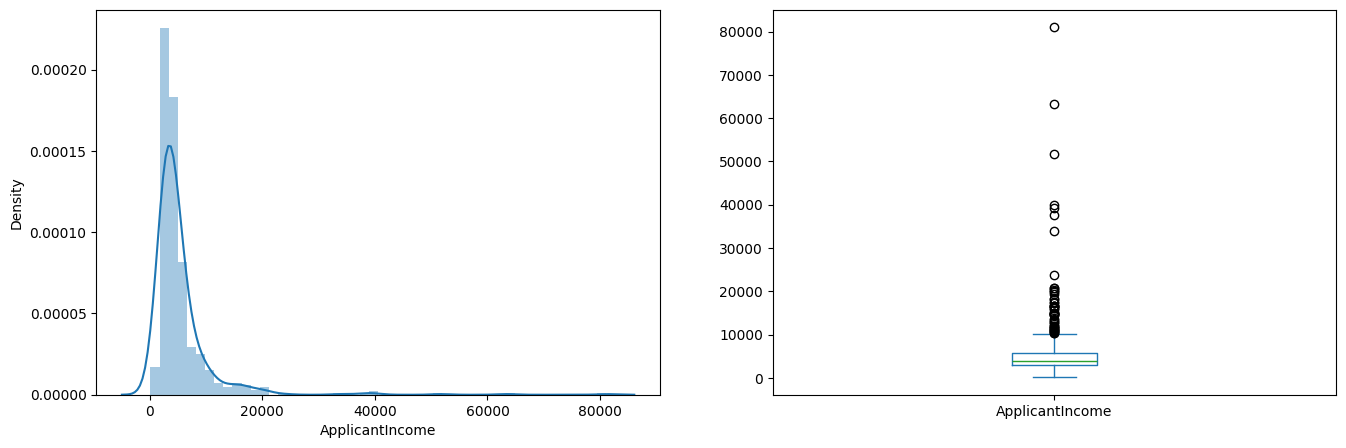

In [1036]:
#  visualizing applicantIncome
# plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

It can be inferred that most of the data in the distriubution of applicant income is toward left which means it is not normally distrubuted. The distrubution of right - skewed(postive skewness).We will try to make it normal in later sections as algorithm works better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society.Part of this can be driven by the fact tath we are looking at people with different education level.Let us segregate them by Education:


<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

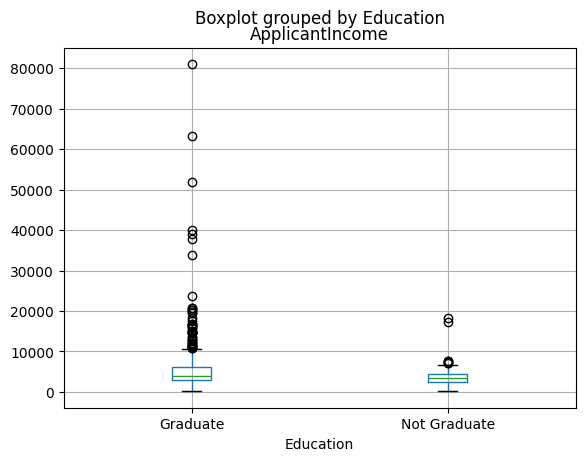

In [1037]:
train.boxplot(column='ApplicantIncome',by = 'Education')


we can see that there are hiher number of graduates with very high incomes,which are appearing to be the outliers.

Secondly,Let's look at the coapplicant income distribution.


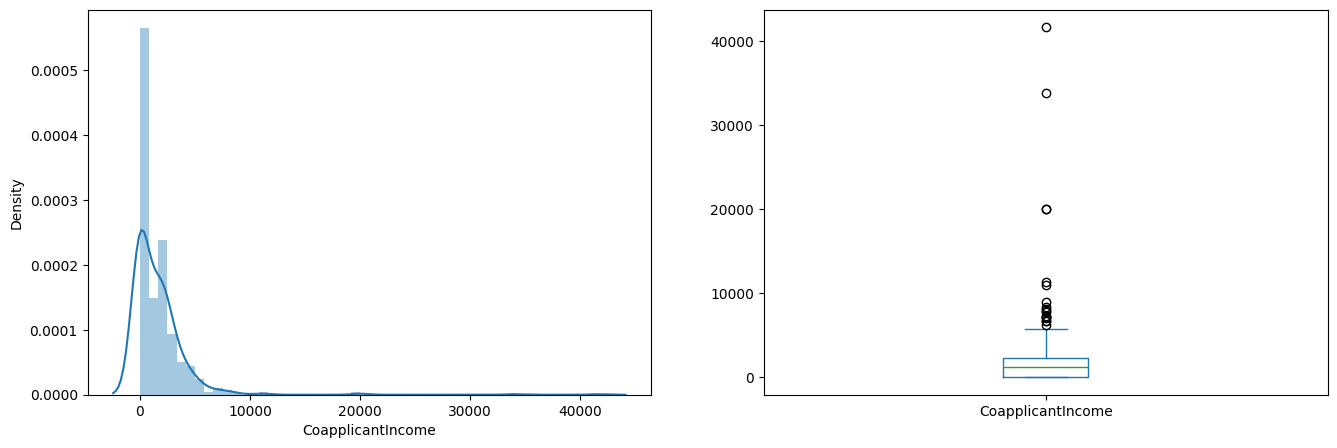

In [1038]:
# plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

We see a similar distribution as that of the applicant income. Majority of coapplicant's income ranges form 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

Thridly, lets look at the distribution fo LoanAmount variable.

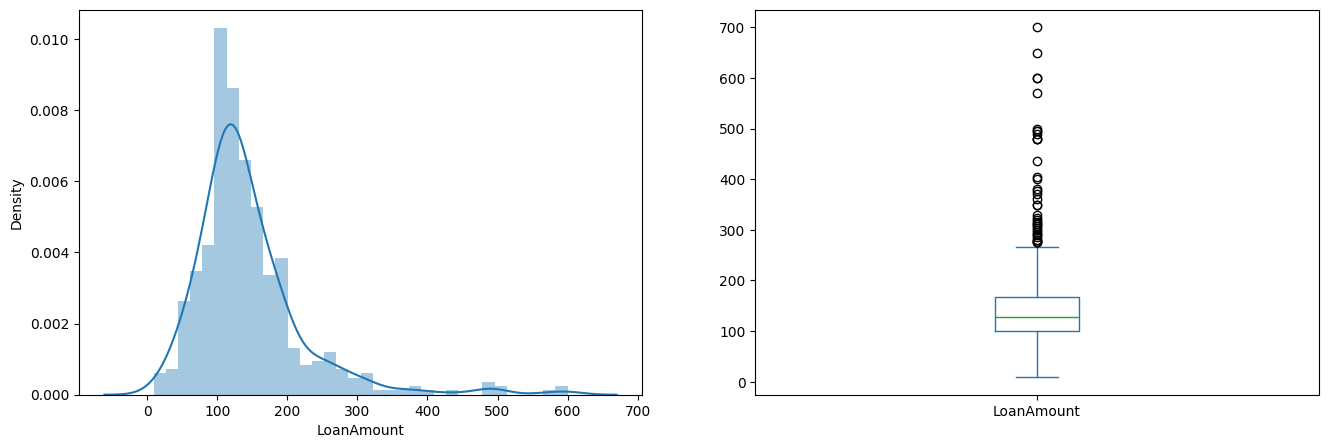

In [1039]:
# plt.figure(1)
plt.subplot(121)
df= train.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

we see a fairly normal distribution(albeit stiil slightly right skewed) for LoanAmount but there are lot of oulier in variable. We will treat the outlier in later sections.

lastly,lets look at the distribution of Loan_Amount_Term Variable.Since Loan_Amount_Term is a discrete variable,we will use frequency table and bar plot which will calculate the number of each category.

In [1040]:
# frequency table of a variable will give use the count of each categroy in that variable
train['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

<Axes: title={'center': 'Loan_Amount_Term'}, xlabel='Loan_Amount_Term'>

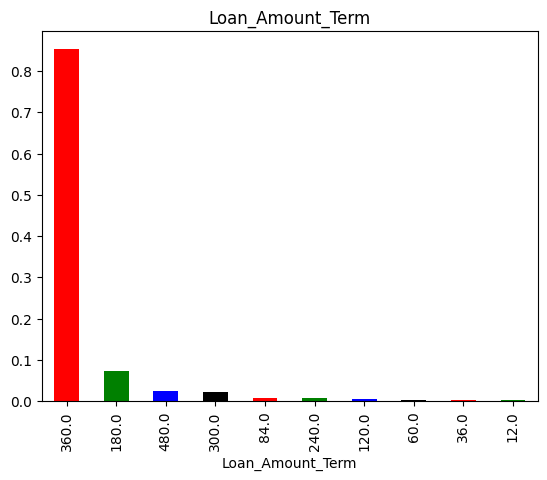

In [1041]:
# plot bar chart
train['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(title='Loan_Amount_Term',color=['red','green','blue','black'])

It can be inferred form the above bar plot that:
- Around 85% of the loans are 360 months term or 30 years period
Now we woould like to know how well each feature correlate with Loan Status.So in the next section we will look at bivariate anaylsis.


### Bivariate Analysis
After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable in bivariate analysis. We can use bivariate analysis to test the hypotheses that we generated earlier.

### Categorical Independent Variable vs Target Variable

First of all we will find the relation between target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans. For example, we want to see whether an applicant's gender will have any effect on approval chances.

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


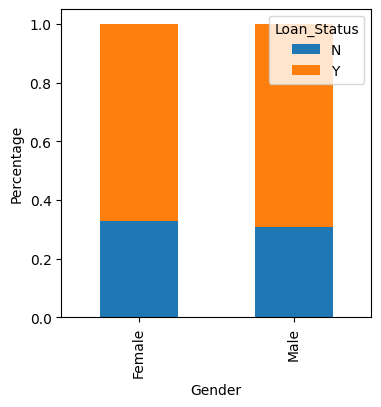

In [1042]:
print(pd.crosstab(train['Gender'],train['Loan_Status']))
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('Gender')
p = plt.ylabel('Percentage')

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


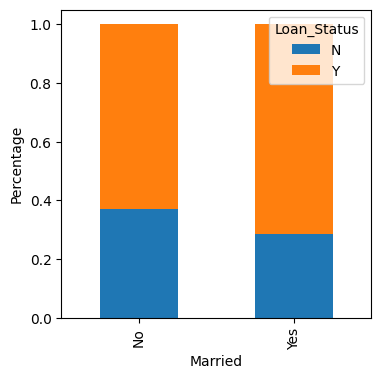

In [1043]:

print(pd.crosstab(train['Married'],train['Loan_Status']))

Married = pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Married')
p = plt.ylabel('Percentage')

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


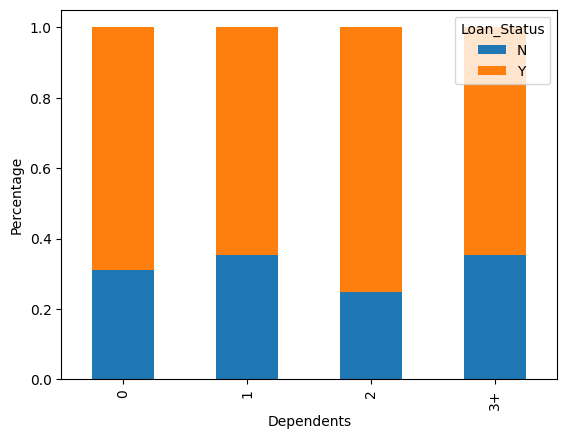

In [1044]:

print(pd.crosstab(train['Dependents'],train['Loan_Status']))

Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Dependents')
p = plt.ylabel('Percentage')

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


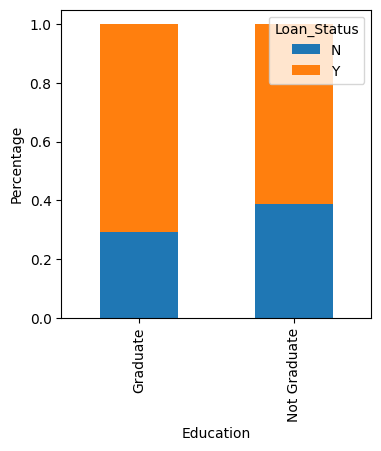

In [1045]:

print(pd.crosstab(train['Education'],train['Loan_Status']))

Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Education')
p = plt.ylabel('Percentage')


Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


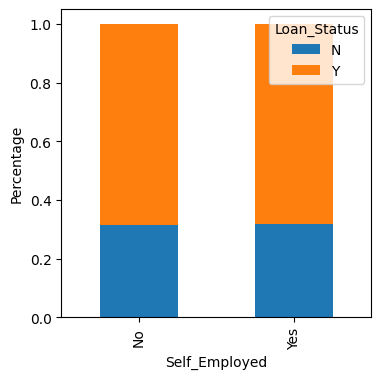

In [1046]:

print(pd.crosstab(train['Self_Employed'],train['Loan_Status']))

Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Self_Employed')
p = plt.ylabel('Percentage')

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


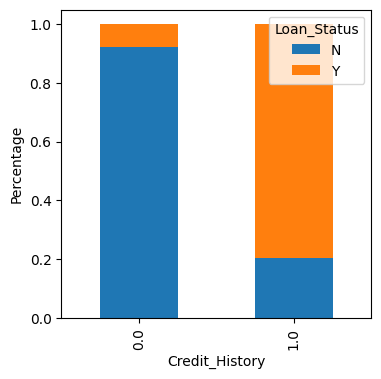

In [1047]:
print(pd.crosstab(train['Credit_History'],train['Loan_Status']))

Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Credit_History')
p = plt.ylabel('Percentage')

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


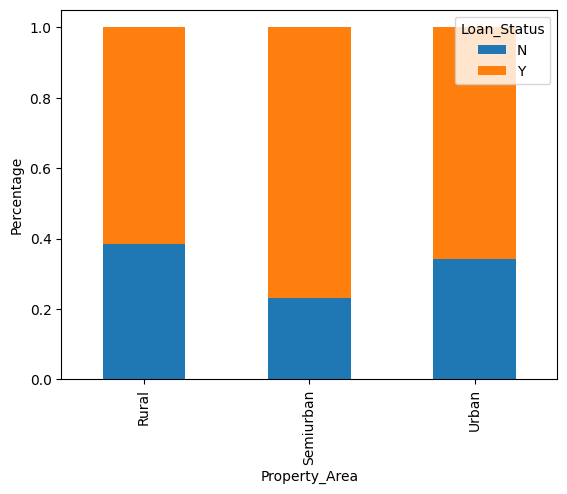

In [1048]:
print(pd.crosstab(train['Property_Area'],train['Loan_Status']))

Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Property_Area')
P = plt.ylabel('Percentage')

From the bar chart above, it can be inferred that:
- proportion of male and female applicants is more or less same for both approved and unapproved loans
- proprotion of married applicants is higher for the approved loans
- distribution of applicants with 1 or 3+ dependent is similar across both categories of Loan_Status
- there is nothing significant we can infer form Self_Employed vs Loan_Status plot.
- it seem people with credit history as 1 aer more likely to get their loan approved
- Proportion of laons getting approved in semiurban are is higher as compared to that in rural or urban areas.

Now let's visualize numerical independent variables with respect to target variable.
### Numerical Independent Variable vs Target Variable
We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64


<Axes: xlabel='Loan_Status'>

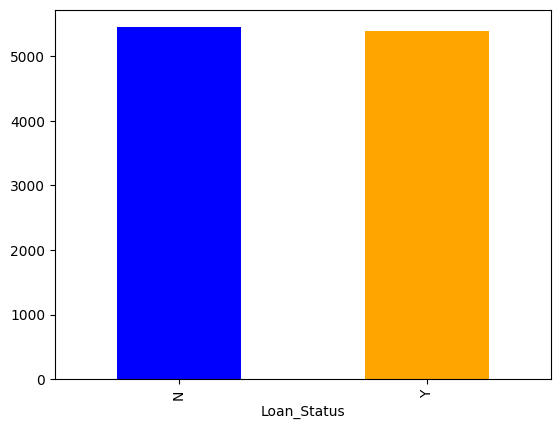

In [1049]:
print(train.groupby('Loan_Status')['ApplicantIncome'].mean())

train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar(color=['blue','orange'])


Here the y-axis represents the mean applicant income. We don’t see any significant difference in the mean income between those approval and not approved applicant (5384 vs 5446).

So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

In [1050]:
# making bins for applicant income variable
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High', 'Very high']
train['Income_bin'] = pd.cut(df['ApplicantIncome'],bins,labels=group)

In [1051]:
# take a look at the train set
train.head(8)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,High
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,Low
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,Average


Loan_Status   N    Y
Income_bin          
Low          26   57
Average      51  123
High         32   79
Very high    39   73


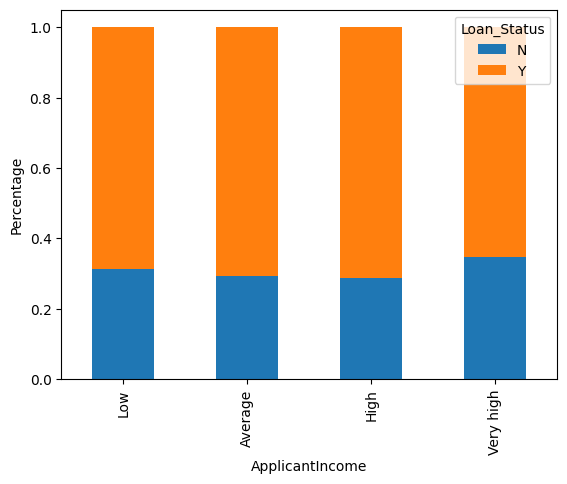

In [1052]:

print(pd.crosstab(train['Income_bin'],train['Loan_Status']))

Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')


It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

We will analyze the Coapplicant income and loan amount variable in similar manner.

In [1053]:

# making bins for Coapplicant income variable
bins = [0,1000,3000,42000]
group = ['Low','Average','High']
train['Coapplicant_Income_bin'] = pd.cut(df['CoapplicantIncome'],bins,labels=group)

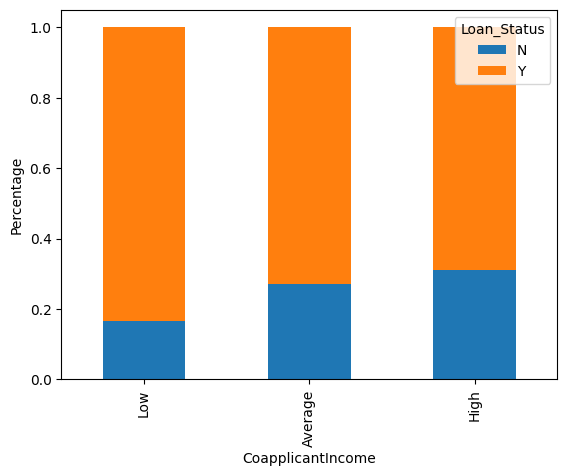

In [1054]:
# plot the chart
Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

In [1055]:
print(len(train[train["CoapplicantIncome"] == 0]))
"Percentage of CoapplicantIncome = 0 is:",  len(train[train["CoapplicantIncome"] == 0])/len(train["CoapplicantIncome"])

273


('Percentage of CoapplicantIncome = 0 is:', 0.44462540716612375)

It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant, so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

Let us combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status.

In [1056]:

# create a new variable
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

In [1057]:
# making bins for Total Income variable
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High', 'Very high']
train['Total_Income_bin'] = pd.cut(train['Total_Income'],bins,labels=group)

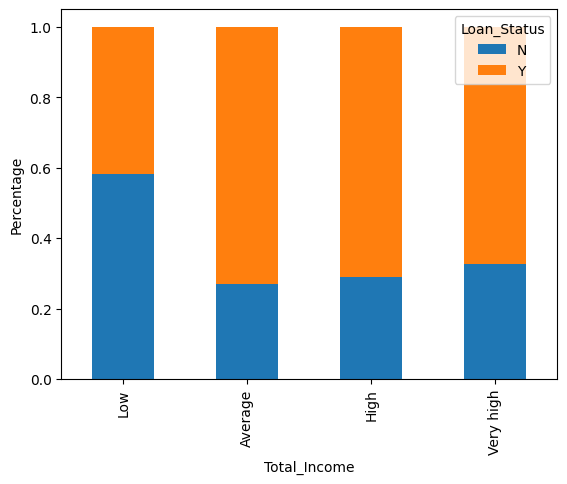

In [1058]:

# plot the chart
Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')


We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income. This is more consistent with our hypothesis with applicants with high income will have more chances of loan approval.

Let’s visualize the Loan amount variable.

In [1059]:
# making bins for LoanAmount variable
bins = [0,100,200,700]
group = ['Low','Average','High']
train['LoanAmount_bin'] = pd.cut(df['LoanAmount'],bins,labels=group)

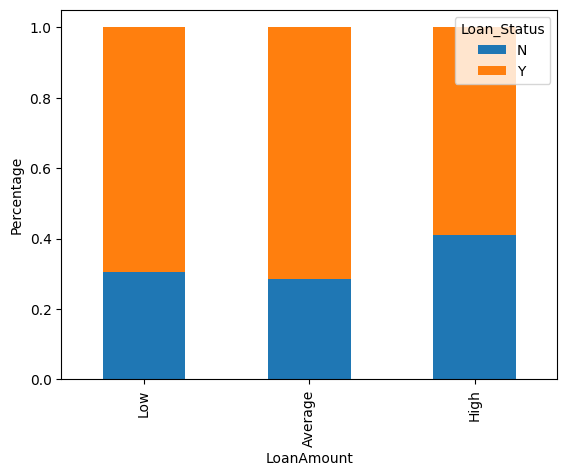

In [1060]:

# plot the chart
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')


It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

Let’s drop the bins which we created for the exploration part.

In [1061]:

# before dropping
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,Total_Income,Total_Income_bin,LoanAmount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,NaN,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0,Very high,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,6000.0,High,Average


In [1062]:
# drop the new variable of bins
train = train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)


In [1063]:

# after dropping
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


We will change the 3+ in dependents variable to 3 to make it a numerical variable. We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.

In [1064]:

# replacing 3+ in Dependents variable with 3 for  train
train['Dependents'].replace('3+', 3, inplace=True)


In [1065]:
# Convert 'Y' to 1 and 'N' to 0, ensuring proper data type conversion
train['Loan_Status'] = train['Loan_Status'].replace({'N': 0, 'Y': 1}).astype(int)


In [1066]:
# check the dataset
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1



Now lets look at the correlation between all the numerical variables. We can use the corr() to compute pairwise correlation of columns, excluding NA/null values using pearson correlation coefficient. Then we will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

In [1067]:
# before dropping
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1



Now lets look at the correlation between all the numerical variables. We can use the corr() to compute pairwise correlation of columns, excluding NA/null values using pearson correlation coefficient. Then we will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more

In [1068]:
train['Loan_Status'].dtype


dtype('int64')

<Axes: >

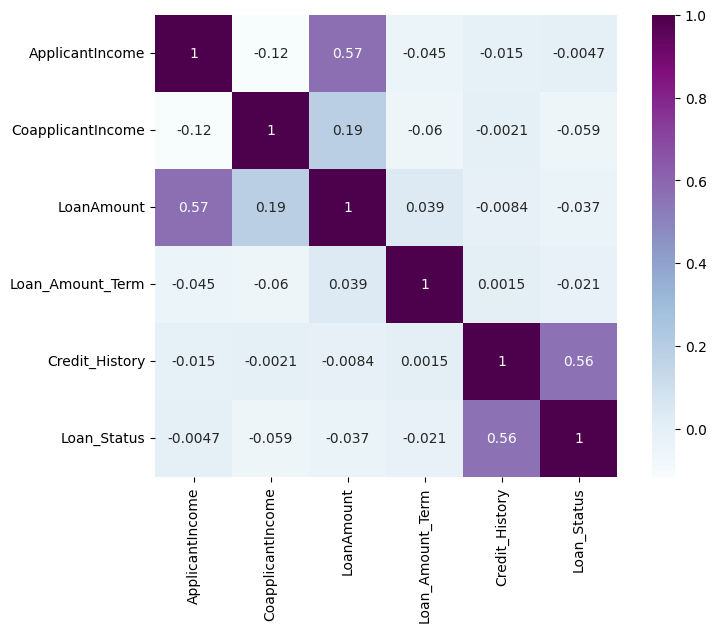

In [1069]:
# calculate and visualize correlation matrix
matrix = train.select_dtypes(include=['number']).corr()
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=1,square=True,cmap='BuPu',annot=True)


**Note: ** We see that the most correlated variables are

- (ApplicantIncome - LoanAmount) with correlation coefficient of 0.57
- (Credit_History - Loan_Status) with correlation coefficient of 0.56
- LoanAmount is also correlated with CoapplicantIncome with correlation coefficient of 0.19.

## Data Pre-Processing
Data pre-processing is a data mining techniques that involve tansforming raw data into an understandable formate.Real-world data is often incomplete,inconsistent,and /or lacking in certain behaviors or treads, and is likely to contain many errors.Data pre-processing is method of resolving such issues.


### Missing value and outlier treatment
After exploring all the variable in out data, we can now imput the missing values and treat the outlier because missing data and outlier can have adverse effect on the model performance.


### Missing vlaue impuation
Let's list out features-wise count of missing values.

In [1070]:

# check for missing values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features. We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:

- For numerical variables: imputation using mean or median
- For categorical variables: imputation using mode

There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode of the features. If an independent variable in our dataset has huge amount of missing data e.g. 80% missing values in it, then we would drop the variable from the dataset.

In [1071]:
# replace missing values with mode
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [1072]:
# now let's try to find a way to fill the missing values in Loan_Amount_Term.We will look at the value count of the loan amount term variable.

train['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

it can be seen that in loan amount term variable, the value of 360 is repeating the most so we will replace the missing values in this variable using the mode of this variable.

In [1073]:
# replace missing value with the mode
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values. We will use median to fill the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [1074]:
# replace missing values with the median value due to outliers
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [1075]:

# check whether all the missing values are filled in the Train dataset
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


As we can see that all the missing values have been filled in the Train dataset. Let’s fill all the missing values in the test dataset too with the same approach.

**Note:** We need to replace the missing values in Test set using the mode/median/mean of the Training set, not from the Test set. Likewise, if you remove values above some threshold in the test case, make sure that the threshold is derived from the training and not test set. Make sure to calculate the mean (or any other metrics) only on the train data to avoid data leakage to your test set.

As we can see that all the missing values have been filled in the test dataset.

### Outlier Treatment
As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat them as the presence of outliers affects the distribution of the data. Having outliers in the dataset often has a significant effect on the mean and standard deviation and hence affecting the distribution. We must take steps to remove outliers from our data sets.

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness (or positive skewness). One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

Let’s visualize the effect of log transformation. We will do the similar changes to the test file simultaneously.

Text(0.5, 1.0, 'Train')

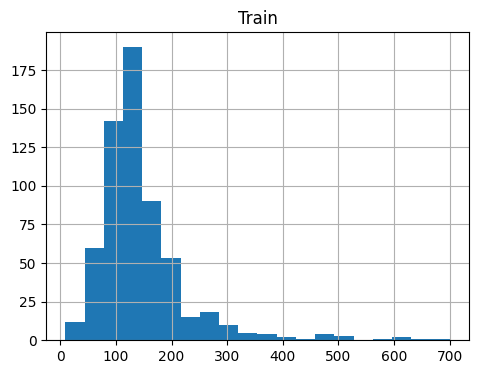

In [1076]:
# before log tansformation
ax1 = plt.subplot(121)
train['LoanAmount'].hist(bins=20,figsize=(12,4))
ax1.set_title('Train')



In [1077]:
# removing the skewness in LoanAmount variable by log tranformation
train['LoanAmount_log']= np.log(train['LoanAmount'])


Text(0.5, 1.0, 'Train')

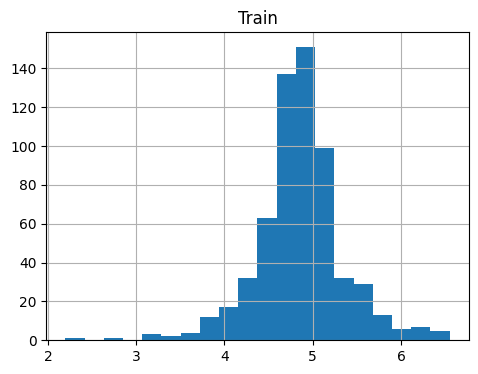

In [1078]:
# after log tranformation
ax1 = plt.subplot(121)
train['LoanAmount_log'].hist(bins=20,figsize=(12,4))
ax1.set_title('Train')



***
## <a name="evaluation">Evaluation Metrics for Classification Problems</a>


The process of model building is not complete without evaluation of model’s performance. Suppose we have the predictions from the model, how can we decide whether the predictions are accurate? We can plot the results and compare them with the actual values, i.e. calculate the distance between the predictions and actual values. Lesser this distance more accurate will be the predictions. Since this is a classification problem, we can evaluate our models using any one of the following evaluation metrics:

**Accuracy**: Let us understand it using the confusion matrix which is a tabular representation of Actual vs Predicted values.




    True Positive - Targets which are actually true(Y) and we have predicted them true(Y)
    True Negative - Targets which are actually false(N) and we have predicted them false(N)
    False Positive - Targets which are actually false(N) but we have predicted them true(T)
    False Negative - Targets which are actually true(T) but we have predicted them false(N)

Using these values, we can calculate the accuracy of the model. The accuracy is given by:

_Accuracy = (TP+TN) / (TP+TN+FP+FN)_

**Precision**: It is a measure of correctness achieved in true prediction i.e. of observations labeled as true, how many are actually labeled true.

_Precision = TP / (TP + FP)_

**Recall (Sensitivity)** - It is a measure of actual observations which are predicted correctly i.e. how many observations of true class are labeled correctly. It is also known as ‘Sensitivity’. E.g. Proportion of patients with a disease who test positive.

_Recall = TP / (TP + FN)_

**Specificity** - It is a measure of how many observations of false class are labeled correctly. E.g. Proportion of patients without the disease who test negative.

_Specificity = TN / (TN + FP)_

Specificity and Sensitivity plays a crucial role in deriving ROC curve.

**ROC curve**

- Receiver Operating Characteristic(ROC) summarizes the model’s performance by evaluating the trade offs between true positive rate (Sensitivity) and false positive rate (1- Specificity).
- The area under curve (AUC), referred to as index of accuracy(A) or concordance index, is a perfect performance metric for ROC curve. Higher the area under curve, better the prediction power of the model.
- The area of this curve measures the ability of the model to correctly classify true positives and true negatives. We want our model to predict the true classes as true and false classes as false.
- So it can be said that we want the true positive rate to be 1. But we are not concerned with the true positive rate only but the false positive rate too. For example in our problem, we are not only concerned about predicting the Y classes as Y but we also want N classes to be predicted as N.
- We want to increase the area of the curve which will be maximum for class 2,3,4 and 5 in the above example.
- For class 1 when the false positive rate is 0.2, the true positive rate is around 0.6. But for class 2 the true positive rate is 1 at the same false positive rate. So, the AUC for class 2 will be much more as compared to the AUC for class 1. So, the model for class 2 will be better.
- The class 2,3,4 and 5 model will predict more accurately as compared to the class 0 and 1 model as the AUC is more for those classes.






***
## <a name="model1">Model Building : Part I</a>

Let us make our first model to predict the target variable. We will start with Logistic Regression which is used for predicting binary outcome.

- Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.
- Logistic regression is an estimation of Logit function. Logit function is simply a log of odds in favor of the event.
- This function creates a s-shaped curve with the probability estimate, which is very similar to the required step wise function



Lets drop the Loan_ID variable as it do not have any effect on the loan status. We will do the same changes to the test dataset which we did for the training dataset.

In [1079]:
# drop Loan_ID
train = train.drop('Loan_ID',axis=1)


we will use scikit-learn (sklearn ) for making different meodels which is an open souce libray for python.it is now the most efficient tool which comtanins may inbuilt function that can be used for modeling in python

In [1080]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760


In [1081]:
# drop" Loan_Status" an assign it target vaiable
X = train.drop('Loan_Status',axis=1)
y = train.Loan_Status

In [1082]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,4.948760


Now we will make dummy variables for the categorical variables. Dummy variable turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare. Let us understand the process of dummies first:

- Consider the “Gender” variable. It has two classes, Male and Female.
- As logistic regression takes only the numerical values as input, we have to change male and female into numerical value.
- Once we apply dummies to this variable, it will convert the “Gender” variable into two variables(Gender_Male and Gender_Female), one for each class, i.e. Male and Female.
- Gender_Male will have a value of 0 if the gender is Female and a value of 1 if the gender is Male.

We can use pandas `get_dummies` function to convert categorical variable into dummy/indicator variables, it will only convert "object" type and will not affect numerical type.f

In [1083]:
# adding dummies to data set
X = pd.get_dummies(X,drop_first=True).astype(int)
train = pd.get_dummies(train,drop_first=True).astype(int)


In [1084]:
X.shape,train.shape,test.shape

((614, 15), (614, 16), (367, 15))

In [1085]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0,128,360,1,4,1,0,1,0,0,0,0,0,1
1,4583,1508,128,360,1,4,1,1,0,1,0,0,0,0,0
2,3000,0,66,360,1,4,1,1,1,0,0,0,1,0,1
3,2583,2358,120,360,1,4,1,1,1,0,0,1,0,0,1
4,6000,0,141,360,1,4,1,0,1,0,0,0,0,0,1


### **Model Training and Prediction**  

We will train the model on the dataset and use it to make predictions. To ensure the model generalizes well, we can split the dataset into two parts: **train** and **test**. The model will be trained on the train part and evaluated on the test part.  

We will use the `train_test_split` function from `sklearn` to divide the dataset. So, first, let us import `train_test_split`.  


In [1086]:
# import library 
from sklearn.model_selection import train_test_split

In [1087]:
# split the data into train and cross validation set
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

In [1088]:
# take a look at the dimension of the data
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((429, 15), (185, 15), (429,), (185,))

The dataset has been divided into training and validation part.Let us import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

In [1089]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [1090]:
# fit the model
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [1091]:
y_pred = model.predict(x_test)

let us calculate how accurate our predictions are by calculating the accuracy

In [1092]:
# calculate accuracy score
accuracy_score(y_test,y_pred)

0.8216216216216217

so our predictions are over 82% accurate, i.e. we have identified 82% of the loan status correctly 

Let's evaluate our model with the confusion matrix

In [1093]:
# import confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 22  29]
 [  4 130]]


Text(50.722222222222214, 0.5, 'True')

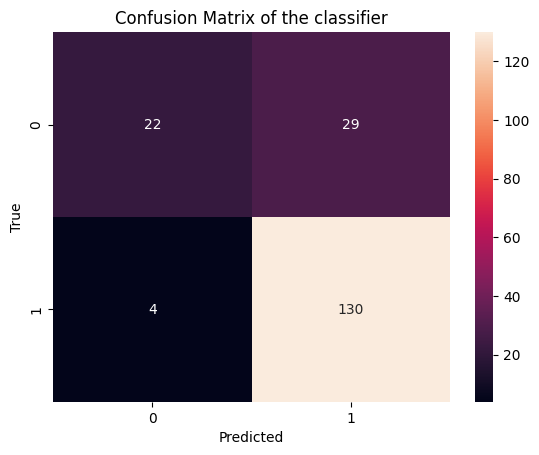

In [1094]:
# f ,ax = plt.subplots(figsize=(9,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.title('Confusion Matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

Let's build a text report showing the main classification metrics.

In [1095]:
# import clasification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.43      0.57        51
           1       0.82      0.97      0.89       134

    accuracy                           0.82       185
   macro avg       0.83      0.70      0.73       185
weighted avg       0.83      0.82      0.80       185



# Feature Engineering 
Based on the domain knowledge, we can come up with new feature that might affect the target variable. we will create the following three new feature:

**Total Income** - As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.

**Equated Monthly Installment** - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.

**Balance Income** - This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

In [1096]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0,128,360,1,1,4,1,0,1,0,0,0,0,0,1
1,4583,1508,128,360,1,0,4,1,1,0,1,0,0,0,0,0
2,3000,0,66,360,1,1,4,1,1,1,0,0,0,1,0,1
3,2583,2358,120,360,1,1,4,1,1,1,0,0,1,0,0,1
4,6000,0,141,360,1,1,4,1,0,1,0,0,0,0,0,1


In [1097]:
# combine the applicant income and coapplicant imcome into a new variable

train['Total_Income'] = train['ApplicantIncome']+ train['CoapplicantIncome']

Text(0.5, 1.0, 'Train')

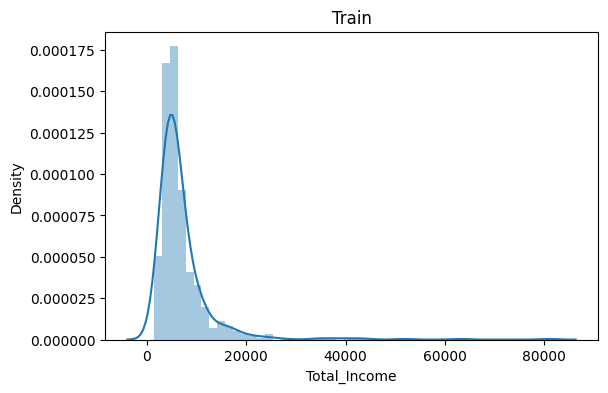

In [1098]:
# check the distribution of total income
fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train['Total_Income'])
 
ax1.set_title("Train")


We can see it is shifted towards left, i.e., the distribution is right skewed. So, let’s take the log transformation to make the distribution normal.

In [1099]:

# log transformation
train['Total_Income_log'] = np.log(train['Total_Income'])

Text(0.5, 1.0, 'Train')

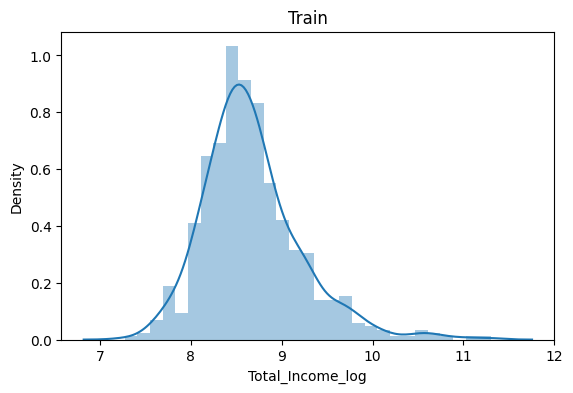

In [1100]:

# after log transformation
fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train['Total_Income_log'])
ax1.set_title("Train")


Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let’s create the EMI feature now. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term. It is just an approximation of actual EMI.

In [1101]:
# create EMI feature
train['EMI'] = train['LoanAmount'] / train['Loan_Amount_Term']


Let’s check the distribution of EMI variable. EMI is a continuous numerical variable.

Text(0.5, 1.0, 'Train')

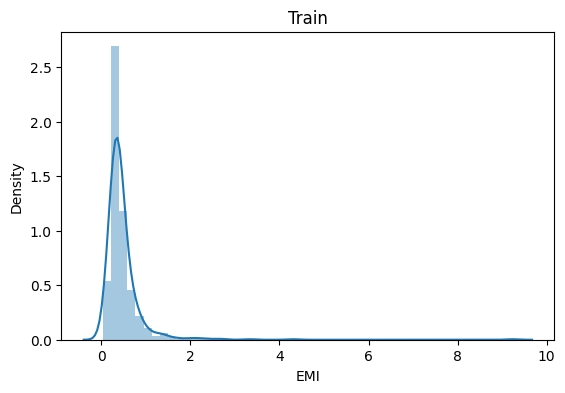

In [1102]:

# check the distribution of EMI

fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train['EMI'])
ax1.set_title("Train")



Let us create Balance Income feature now and check its distribution. This is the income left after the EMI has been paid.

In [1103]:
# create new "Balance Income" variable
train['Balance Income'] = train['Total_Income'] - (train['EMI']*1000) # Multiply with 1000 to make the units equal 


Text(0.5, 1.0, 'Train')

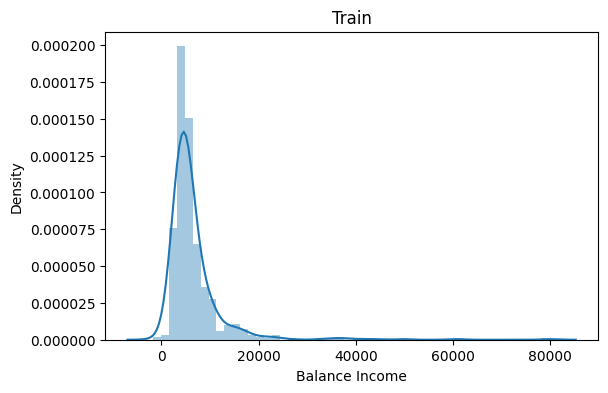

In [1104]:

# check the distribution of EMI
# before log transformation

fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train['Balance Income'])
ax1.set_title("Train")


Let us now drop the variables which we used to create these new features. Reason for doing this is, the correlation between those old features and these new features will be very high and logistic regression assumes that the variables are not highly correlated. We also wants to remove the noise from the dataset, so removing correlated features will help in reducing the noise too. We will drop "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term" as they are already represented by "Total Income", "EMI" and "Balance Income".

In [1105]:

# before dropping variables
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance Income
0,5849,0,128,360,1,1,4,1,0,1,0,0,0,0,0,1,5849,8.674026,0.355556,5493.444444
1,4583,1508,128,360,1,0,4,1,1,0,1,0,0,0,0,0,6091,8.714568,0.355556,5735.444444
2,3000,0,66,360,1,1,4,1,1,1,0,0,0,1,0,1,3000,8.006368,0.183333,2816.666667
3,2583,2358,120,360,1,1,4,1,1,1,0,0,1,0,0,1,4941,8.505323,0.333333,4607.666667
4,6000,0,141,360,1,1,4,1,0,1,0,0,0,0,0,1,6000,8.699515,0.391667,5608.333333


In [1106]:
# drop the variables
train = train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)


In [1107]:

# after dropping variables
train.head()

,Credit_History,Loan_Status,LoanAmount_log,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance Income
0,1,1,4,1,0,1,0,0,0,0,0,1,5849,8.674026,0.355556,5493.444444
1,1,0,4,1,1,0,1,0,0,0,0,0,6091,8.714568,0.355556,5735.444444
2,1,1,4,1,1,1,0,0,0,1,0,1,3000,8.006368,0.183333,2816.666667
3,1,1,4,1,1,1,0,0,1,0,0,1,4941,8.505323,0.333333,4607.666667
4,1,1,4,1,0,1,0,0,0,0,0,1,6000,8.699515,0.391667,5608.333333



### Model Building : Part II
After creating new features, we can continue the model building process. So we will start with logistic regression model and then move over to Decision Tree , Random Forest and  Naive Bayes

In [1108]:
X = train.drop('Loan_Status',axis=1)
y = train.Loan_Status

In [1109]:
# split the data into train and test set
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

# Logistic regression

In [1110]:
# Initialize and train Logistic Regression model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [1111]:
# Predict on test set
y_pred = model.predict(x_test)


In [1112]:
# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Import evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [1113]:

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Use 'macro' or 'micro' for multi-class
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8270
Precision: 0.8187
Recall: 0.9776
F1 Score: 0.8912
Confusion Matrix:
 [[ 22  29]
 [  3 131]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.43      0.58        51
           1       0.82      0.98      0.89       134

    accuracy                           0.83       185
   macro avg       0.85      0.70      0.74       185
weighted avg       0.84      0.83      0.81       185



# Decision Tree

In [1114]:
# Initialize and train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(x_train, y_train)

# Predict on test set
y_pred_dt = dt_model.predict(x_test)


In [1115]:

# Compute evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='binary')  # Use 'macro' or 'micro' for multi-class
recall_dt = recall_score(y_test, y_pred_dt, average='binary')
f1_dt = f1_score(y_test, y_pred_dt, average='binary')
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)


In [1116]:

# Display metrics
print(f"Decision Tree - Accuracy: {accuracy_dt:.4f}")
print(f"Decision Tree - Precision: {precision_dt:.4f}")
print(f"Decision Tree - Recall: {recall_dt:.4f}")
print(f"Decision Tree - F1 Score: {f1_dt:.4f}")
print("Decision Tree - Confusion Matrix:\n", conf_matrix_dt)
print("Decision Tree - Classification Report:\n", class_report_dt)

Decision Tree - Accuracy: 0.6919
Decision Tree - Precision: 0.8130
Decision Tree - Recall: 0.7463
Decision Tree - F1 Score: 0.7782
Decision Tree - Confusion Matrix:
 [[ 28  23]
 [ 34 100]]
Decision Tree - Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.55      0.50        51
           1       0.81      0.75      0.78       134

    accuracy                           0.69       185
   macro avg       0.63      0.65      0.64       185
weighted avg       0.71      0.69      0.70       185



In [1117]:

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(x_train, y_train)


RandomForestClassifier(random_state=0)

In [1118]:

# Predict on test set
y_pred_rf = rf_model.predict(x_test)

# Compute evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='binary')  # Use 'macro' or 'micro' for multi-class
recall_rf = recall_score(y_test, y_pred_rf, average='binary')
f1_rf = f1_score(y_test, y_pred_rf, average='binary')
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)


In [1119]:

# Display metrics
print(f"Random Forest - Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest - Precision: {precision_rf:.4f}")
print(f"Random Forest - Recall: {recall_rf:.4f}")
print(f"Random Forest - F1 Score: {f1_rf:.4f}")
print("Random Forest - Confusion Matrix:\n", conf_matrix_rf)
print("Random Forest - Classification Report:\n", class_report_rf)



Random Forest - Accuracy: 0.7838
Random Forest - Precision: 0.8219
Random Forest - Recall: 0.8955
Random Forest - F1 Score: 0.8571
Random Forest - Confusion Matrix:
 [[ 25  26]
 [ 14 120]]
Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.49      0.56        51
           1       0.82      0.90      0.86       134

    accuracy                           0.78       185
   macro avg       0.73      0.69      0.71       185
weighted avg       0.77      0.78      0.77       185



In [1120]:


# Initialize and train Naïve Bayes model
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)


GaussianNB()

In [1121]:

# Predict on test set
y_pred_nb = nb_model.predict(x_test)

# Compute evaluation metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='binary')  # Use 'macro' or 'micro' for multi-class
recall_nb = recall_score(y_test, y_pred_nb, average='binary')
f1_nb = f1_score(y_test, y_pred_nb, average='binary')
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
class_report_nb = classification_report(y_test, y_pred_nb)


In [1122]:

# Display metrics
print(f"Naïve Bayes - Accuracy: {accuracy_nb:.4f}")
print(f"Naïve Bayes - Precision: {precision_nb:.4f}")
print(f"Naïve Bayes - Recall: {recall_nb:.4f}")
print(f"Naïve Bayes - F1 Score: {f1_nb:.4f}")
print("Naïve Bayes - Confusion Matrix:\n", conf_matrix_nb)
print("Naïve Bayes - Classification Report:\n", class_report_nb)


Naïve Bayes - Accuracy: 0.8270
Naïve Bayes - Precision: 0.8269
Naïve Bayes - Recall: 0.9627
Naïve Bayes - F1 Score: 0.8897
Naïve Bayes - Confusion Matrix:
 [[ 24  27]
 [  5 129]]
Naïve Bayes - Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.47      0.60        51
           1       0.83      0.96      0.89       134

    accuracy                           0.83       185
   macro avg       0.83      0.72      0.74       185
weighted avg       0.83      0.83      0.81       185



## Feature Importance
Let us find the feature importance now, i.e. which features are most important for this problem. We will use feature_importances_ attribute of sklearn to do so. It will return the feature importances (the higher, the more important the feature).

<Axes: >

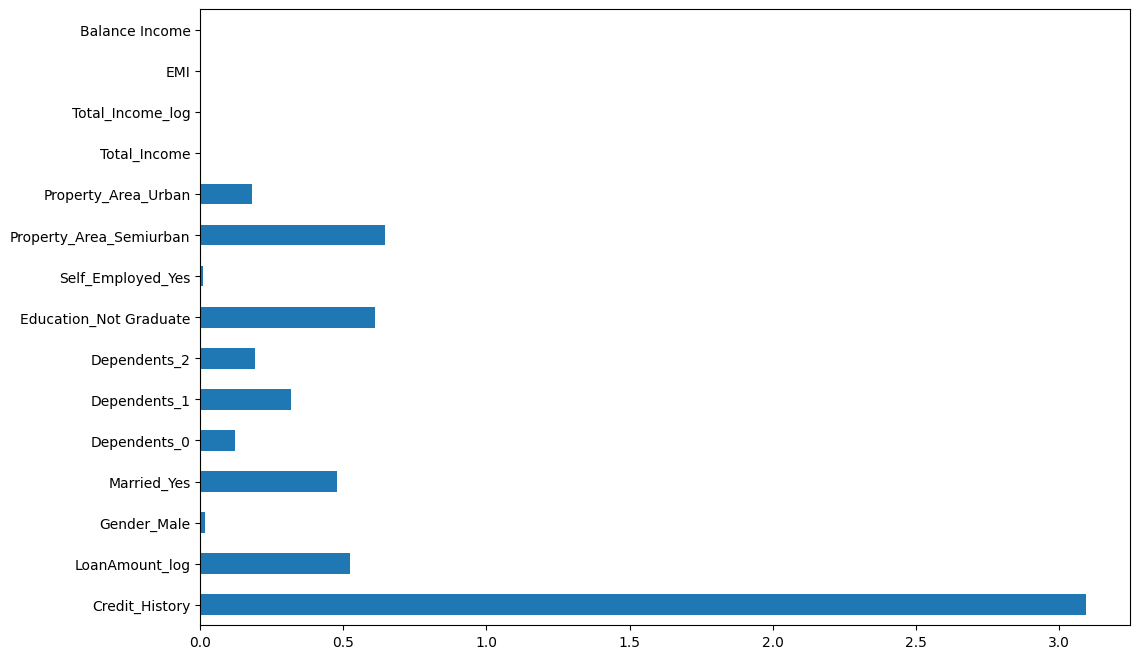

In [1126]:
importances = pd.Series(abs(model.coef_[0]), index=X.columns)
importances.plot(kind='barh', figsize=(12,8))


From the feature importance plot, it is clear that Credit_History strongly dominates the model’s predictions, followed by LoanAmount_log, Education_Not Graduate, Property_Area_Semiurban, and Married_Yes. In contrast, Gender_Male, Property_Area_Urban, and Self_Employed_Yes have minimal impact, while features like Total_Income and EMI contribute very little. Overall, the model relies heavily on whether applicants have a favorable credit history.